<a href="https://colab.research.google.com/github/AzadMehedi/Data-Pipeline/blob/main/run_pipeline_in_python_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

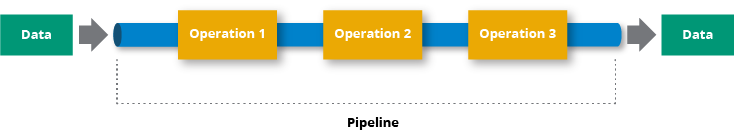

# Creating Machine Learning Pipeline

In [2]:
# import packages

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [6]:
# load dataset

df = pd.read_csv('/content/pima-indians-diabetes.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# assiging Columns name

df.columns = ['Pregnancies','Glucose','BloodPressure','SkinThicness','Insulin','BMI','DiabetesPedigreeFunction','Age','Class']
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThicness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [10]:
# Dividing Data Into train test 

X = df.iloc[:, [0,1,2,3,4,5,6,7]]  # all the rows and columns =  ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThicness',	
                                                                 # 'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']
y = df.iloc[:, [8]]                # all the rows and columns = ['Class]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Creating Pipeline
### Creating pipeline for `LogisticRegression`, `DecisionTree` and `RandomForest` models
The pipeline steps will be include
---------------------------------------
1. Data Preprocessing using MinMaxScaler
2. Reducing Dimentionality using PCA
3. Training the models

In [17]:
# Logistic Regression Pipeline

LogisticRegressionPipeline = Pipeline([('myscaler',MinMaxScaler()), 
                                       ('mypca',PCA(n_components=3)), 
                                       ('logist_regression',LogisticRegression())])

In [19]:
# Decision Tree Pipeline

DecisionTreePipeline = Pipeline([('myscaler',MinMaxScaler()), 
                                       ('mypca',PCA(n_components=3)), 
                                       ('logist_regression',DecisionTreeClassifier())])

In [20]:
# Random Forest Pipeline

RandomForestPipeline = Pipeline([('myscaler',MinMaxScaler()), 
                                       ('mypca',PCA(n_components=3)), 
                                       ('logist_regression',RandomForestClassifier())])

# Model training and validation

In [25]:
# Defining the pipelines in a list

mypipeline = [LogisticRegressionPipeline, DecisionTreePipeline, RandomForestPipeline]

In [50]:
# Defining variables for choosing the best model

accuracy = 0
# classifier = 0
pipeline = ''

In [28]:
# creating dictionaries of pipelines and training models
PipelineDict = {0:'Logistic Regreesion', 1:'Decision Tree', 2:'Random Forest'}

In [29]:
# Fit the pipelines
for mypipe in mypipeline:
  mypipe.fit(X_train, y_train)

In [32]:
# Getting test accuracy for all the pipeline

for i, model in enumerate(mypipeline):
  print('{} Test Accuracy: {}'.format(PipelineDict[i], model.score(X_test, y_test)))

Logistic Regreesion Test Accuracy: 0.7077922077922078
Decision Tree Test Accuracy: 0.7077922077922078
Random Forest Test Accuracy: 0.7532467532467533


In [52]:
# Choosing the best model for the given data

for i, model in enumerate(mypipeline):
  if model.score(X_test, y_test) > accuracy:
    accuracy = model.score(X_test, y_test)
    pipeline = model
    # classifier = i
# print('Classifier with the best Accuracy: {}: {}'.format(PipelineDict[classifier], accuracy))
print('Classifier with the best Accuracy: {}: {}'.format(PipelineDict[i], accuracy))

Classifier with the best Accuracy: Random Forest: 0.7532467532467533
